# **Importing Modules**

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# **Importing Datasets**

In [ ]:
data = pd.read_csv('/content/dataset.csv')

**Training Dataset**

In [ ]:
data.shape

(374247, 12)

In [ ]:
data.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown
0,05-02-2019,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,0.0
1,05-02-2019,9,97,668.48,B,125833,38.01,2.572,214.655459,6.415,0,0.0
2,05-02-2019,9,85,693.87,B,125833,38.01,2.572,214.655459,6.415,0,0.0
3,05-02-2019,8,80,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,0.0
4,05-02-2019,9,55,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374247 entries, 0 to 374246
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            374247 non-null  object 
 1   Store           374247 non-null  int64  
 2   Dept            374247 non-null  int64  
 3   Weekly_Sales    374247 non-null  float64
 4   Type            374247 non-null  object 
 5   Size            374247 non-null  int64  
 6   Temperature     374247 non-null  float64
 7   Fuel_Price      374247 non-null  float64
 8   CPI             374247 non-null  float64
 9   Unemployment    374247 non-null  float64
 10  IsHoliday       374247 non-null  int64  
 11  Total_MarkDown  374247 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 34.3+ MB


In [ ]:
data.isna().sum().sum() #Checking for missing values

0

In [ ]:
data.isnull().sum().sum() #Checking for null values
#isna()and isnull() both do not detect empty strings ‘’

0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [ ]:
data.sort_values(by=['Date'],inplace=True)
#With inplace=True,modifies data directly and no need to assign the result back to data.

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown
Date,,,,,,,,,,,,
2019-02-05,2019-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,0.0
2019-02-05,2019-02-05,29,46,11641.81,B,93638,24.36,2.788,131.527903,10.064,0,0.0
2019-02-05,2019-02-05,29,44,2159.51,B,93638,24.36,2.788,131.527903,10.064,0,0.0
2019-02-05,2019-02-05,29,26,2619.38,B,93638,24.36,2.788,131.527903,10.064,0,0.0
2019-02-05,2019-02-05,29,81,6319.97,B,93638,24.36,2.788,131.527903,10.064,0,0.0


# **Splitting Date Column**

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [ ]:
data.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown,Year,Month,Day
Date,,,,,,,,,,,,,,,
2019-02-05,2019-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,0.0,2019,2,5
2019-02-05,2019-02-05,29,46,11641.81,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5
2019-02-05,2019-02-05,29,44,2159.51,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5
2019-02-05,2019-02-05,29,26,2619.38,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5
2019-02-05,2019-02-05,29,81,6319.97,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5


# **Outlier Detection and Abnormalities**

**Outliers**

In [ ]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
# reset index - ensures the agg_data set has index starting from 0
# .agg is an inbuilt function which helps us get all statistical values like min, max etc.
agg_data.isnull().sum()

,0
Store,0
Dept,0
max,0
min,0
mean,0
median,0
std,22


In [ ]:
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22571.675507,18489.485,10016.131700
1,1,2,65615.36,35819.83,46003.221667,45518.770,3362.286286
2,1,3,51159.17,6165.73,13102.518696,10354.785,8728.640483
3,1,4,47893.23,32497.43,36825.351667,36496.840,2824.047407
4,1,5,70158.86,11570.27,23301.622920,20562.370,9026.711894


In [ ]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [ ]:
data.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown,Year,Month,Day,max,min,mean,median,std
0,2019-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,0.0,2019,2,5,57592.12,14537.37,22571.675507,18489.485,10016.131700
1,2019-02-05,29,46,11641.81,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5,27714.54,8412.85,12114.003310,11891.635,2371.195755
2,2019-02-05,29,44,2159.51,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5,4977.84,1087.25,1975.904507,1883.645,522.907939
3,2019-02-05,29,26,2619.38,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5,9113.18,1851.35,4051.657113,3825.980,1287.025016
4,2019-02-05,29,81,6319.97,B,93638,24.36,2.788,131.527903,10.064,0,0.0,2019,2,5,7828.32,4093.99,5296.956056,5272.590,446.511461


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown,Year,Month,Day,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,
2019-02-05,2019-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,0.0,2019,2,5,57592.12,14537.37,22571.675507,18489.485,10016.131700
2019-02-05,2019-02-05,9,85,693.87,B,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,5,2512.14,110.56,877.649437,825.255,308.281414
2019-02-05,2019-02-05,8,80,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,0.0,2019,2,5,11990.43,7414.43,9188.880857,9155.115,763.429861
2019-02-05,2019-02-05,9,55,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,5,29166.26,4791.74,8504.516479,7501.400,3688.039540
2019-02-05,2019-02-05,9,52,1150.25,B,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,5,3490.13,722.87,1662.566761,1613.520,414.322579


In [ ]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [ ]:
data.shape

(374225, 20)

In [ ]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape
#removes outliers from the DataFrame data based on the Z-score method.
# Z score tells how many standard deviations away a data point is from the mean.
#Z score = (x -mean) / std. deviation

(335906, 20)

**Negative Weekly Sales**

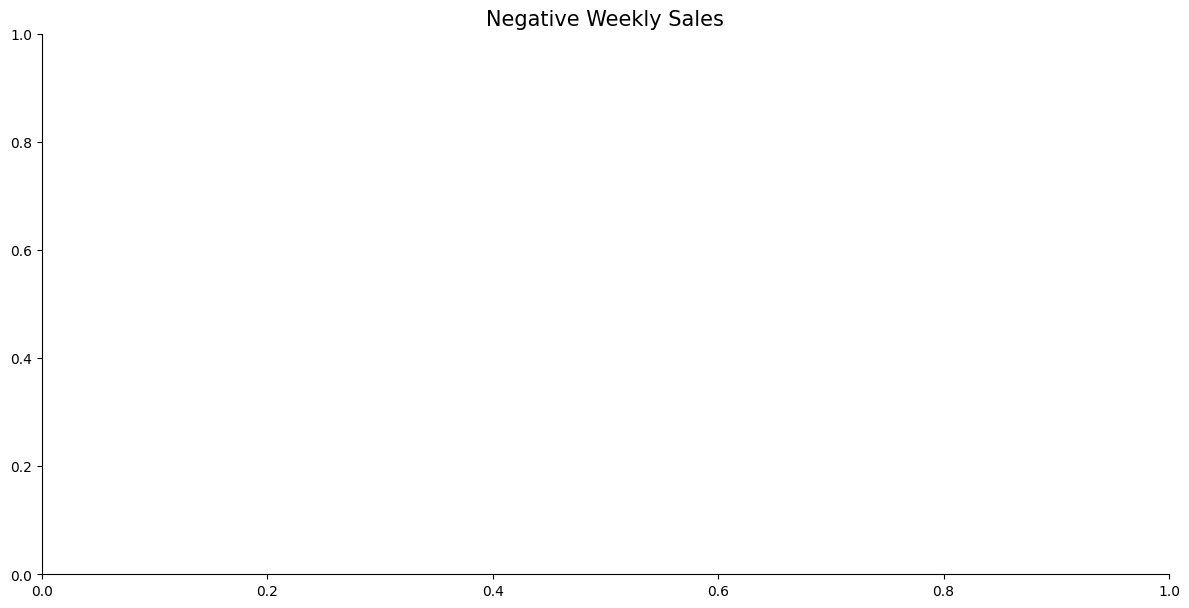

In [ ]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [ ]:
data[data['Weekly_Sales']>=0].shape

(335906, 20)

In [ ]:
data[data['Weekly_Sales']<0].shape

(0, 20)

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [ ]:
data['IsHoliday'].head()

,IsHoliday
Date,
2019-02-05,0
2019-02-05,0
2019-02-05,0
2019-02-05,0
2019-02-05,0


# **Data Visuallizations**

**Average Monthly Sales**

In [ ]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

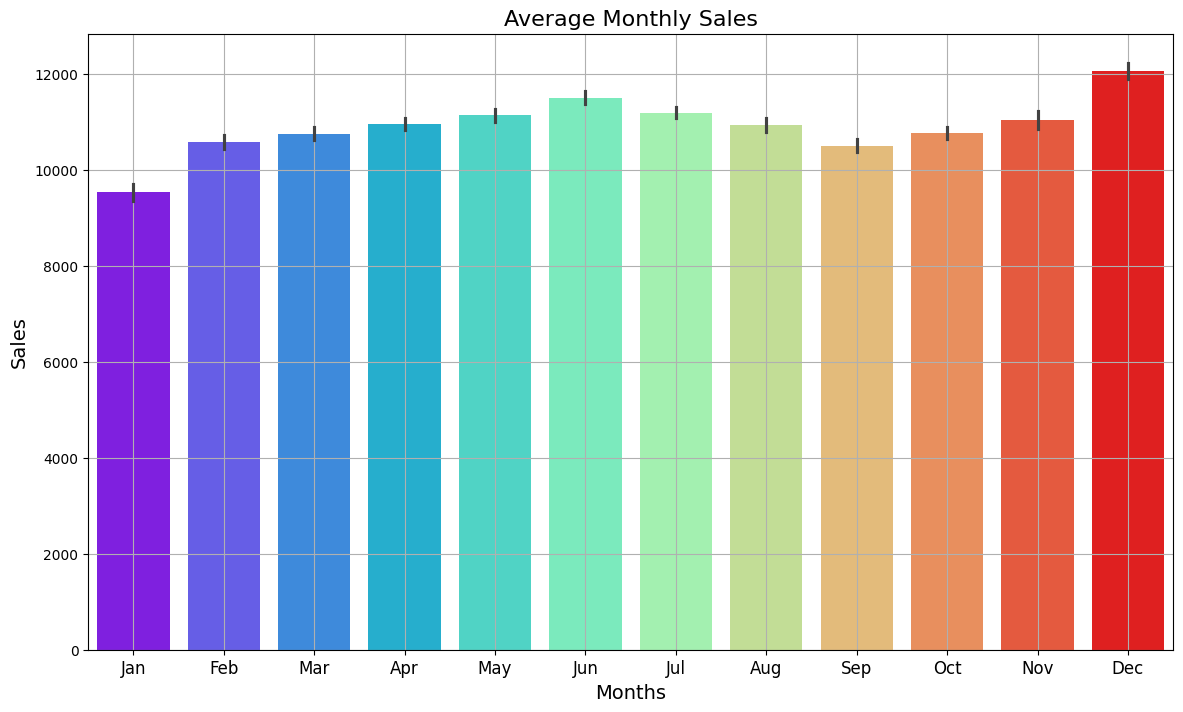

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month', y='Weekly_Sales', data=data, palette="rainbow", hue='Month', legend=False)
plt.xticks(ticks=range(12), labels=[month_names[i+1] for i in range(12)], fontsize=12)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()
plt.show()

**Monthly Sales for Each Year**

In [ ]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
# calculates weekly sales for eah month of each year separately
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,NaN,1.113863e+08,1.125976e+08,1.420960e+08,1.159948e+08,1.175873e+08,1.441926e+08,1.150571e+08,1.096988e+08,1.378704e+08,1.150991e+08,1.512638e+08
2020,93077292.36,1.036714e+08,1.085114e+08,1.397044e+08,1.130008e+08,1.172397e+08,1.426891e+08,1.124787e+08,1.352829e+08,1.111099e+08,7.035658e+07,1.014258e+08
2021,73247633.43,3.385958e+07,1.152106e+08,9.970555e+07,9.476818e+07,1.307028e+08,1.032516e+08,9.572006e+07,9.752390e+07,1.094419e+08,NaN,NaN


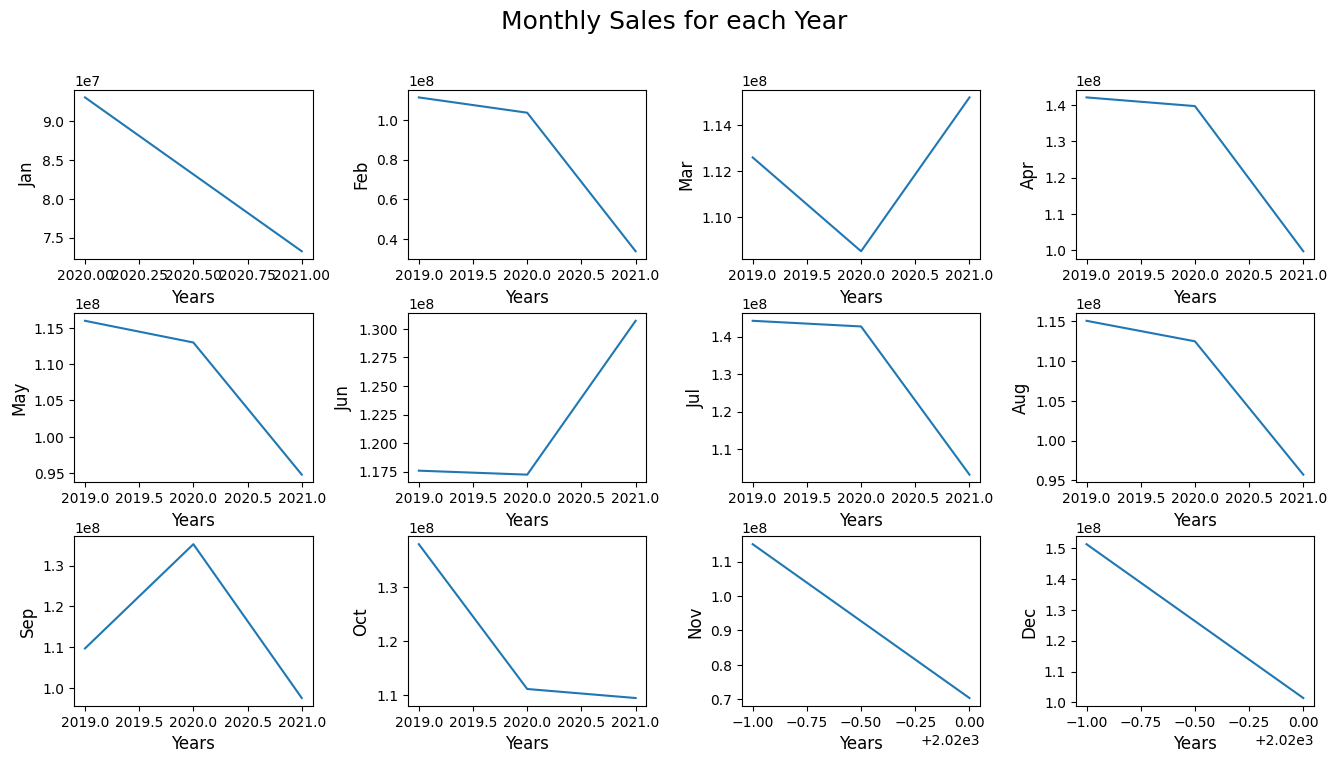

In [ ]:
import calendar
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      axes[i, j].set_xlabel('Years', fontsize=12)
      axes[i, j].set_ylabel(calendar.month_abbr[k], fontsize=12)
      k+=1

plt.show()

# shows month wise trends

**Average Weekly Sales Store wise**

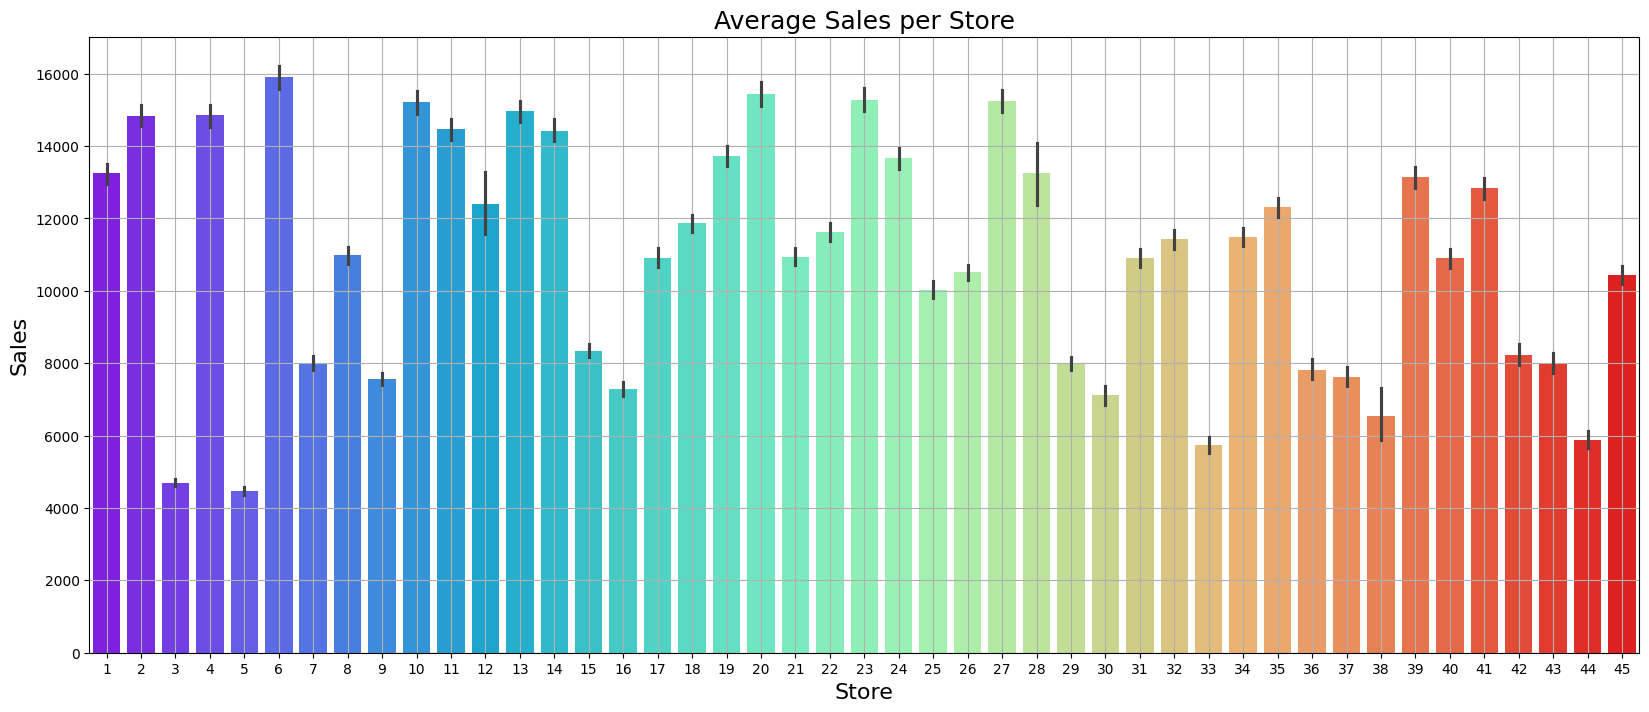

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data, hue='Store', palette="rainbow", legend=False)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

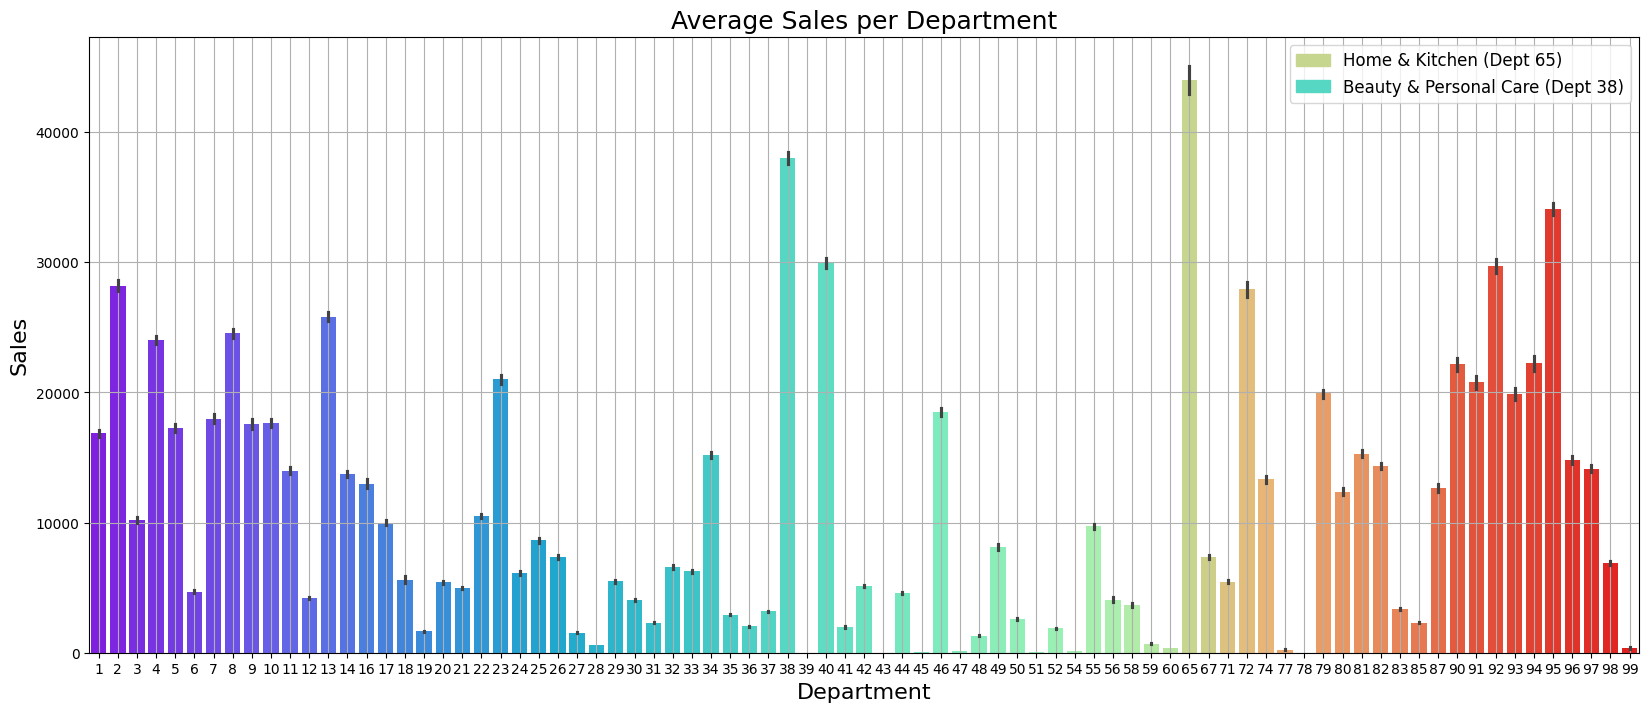

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data, hue='Dept', palette="rainbow", legend=False)
plt.grid()
home_kitchen_patch = mpatches.Patch(color='#c7d68f', label='Home & Kitchen (Dept 65)')
beauty_care_patch = mpatches.Patch(color='#56d7c4', label='Beauty & Personal Care (Dept 38)')
plt.legend(handles=[home_kitchen_patch, beauty_care_patch], loc='upper right', fontsize=12)
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

# 1 --> Home & Kitchen
# 2 --> Beauty & Personal Care

**Holiday Distribution**

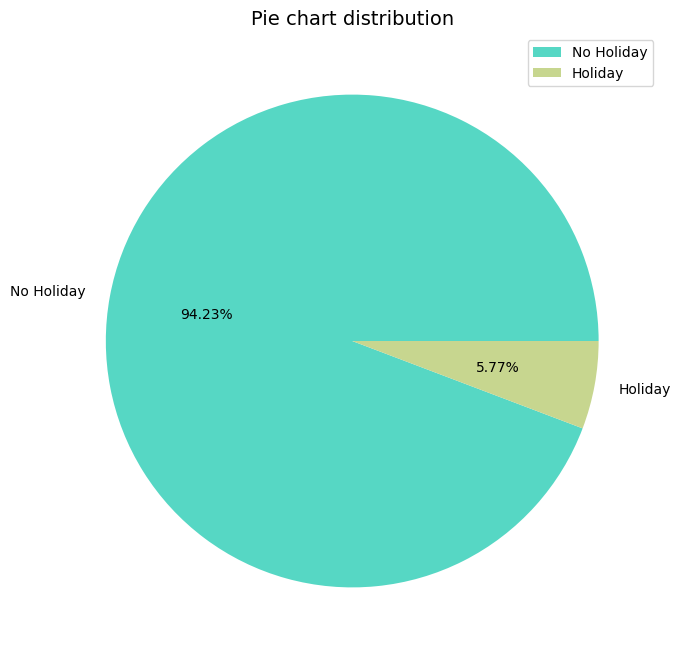

In [ ]:
plt.figure(figsize=(8,8))
colors = ['#56d7c4', '#c7d68f']  # light green and teal
plt.pie(data['IsHoliday'].value_counts(), labels=['No Holiday','Holiday'], colors=colors, autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

# **One-hot-encoding**
One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [ ]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [ ]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2021-10-26,27,6,A
2021-10-26,37,14,C
2021-10-26,28,21,A
2021-10-26,27,5,A
2021-10-26,45,98,B


In [ ]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
data.shape

(335906, 20)

In [ ]:
data = pd.concat([data, data_cat],axis=1)

In [ ]:
data.shape

(335906, 149)

In [ ]:
data.drop(columns=cat_col,inplace=True)

In [ ]:
data.drop(columns=['Date'],inplace=True)

In [ ]:
data.shape

(335906, 145)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown,Year,Month,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,0.0,2019,2,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,0.0,2019,2,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,1150.25,125833,38.01,2.572,214.655459,6.415,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False


# **Data Normalization**

In [ ]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [ ]:
#Min-Max scaling is a normalization technique used to transform features to a specific range, typically [0, 1].
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
data = normalization(data.copy(),num_col)

In [ ]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Total_MarkDown,Year,Month,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-05,0.483042,0.630267,0.320606,0.0501,0.840500,0.576894,0,0.0,2019,2,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,0.013447,0.492338,0.270089,0.0501,0.875680,0.323181,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,0.167728,0.650636,0.224624,0.0501,0.873861,0.305776,0,0.0,2019,2,...,False,False,False,False,False,False,False,True,False,False
2019-02-05,0.215577,0.492338,0.270089,0.0501,0.875680,0.323181,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False
2019-02-05,0.022292,0.492338,0.270089,0.0501,0.875680,0.323181,0,0.0,2019,2,...,False,False,False,False,False,False,False,False,True,False


# **Correlation between features of dataset**

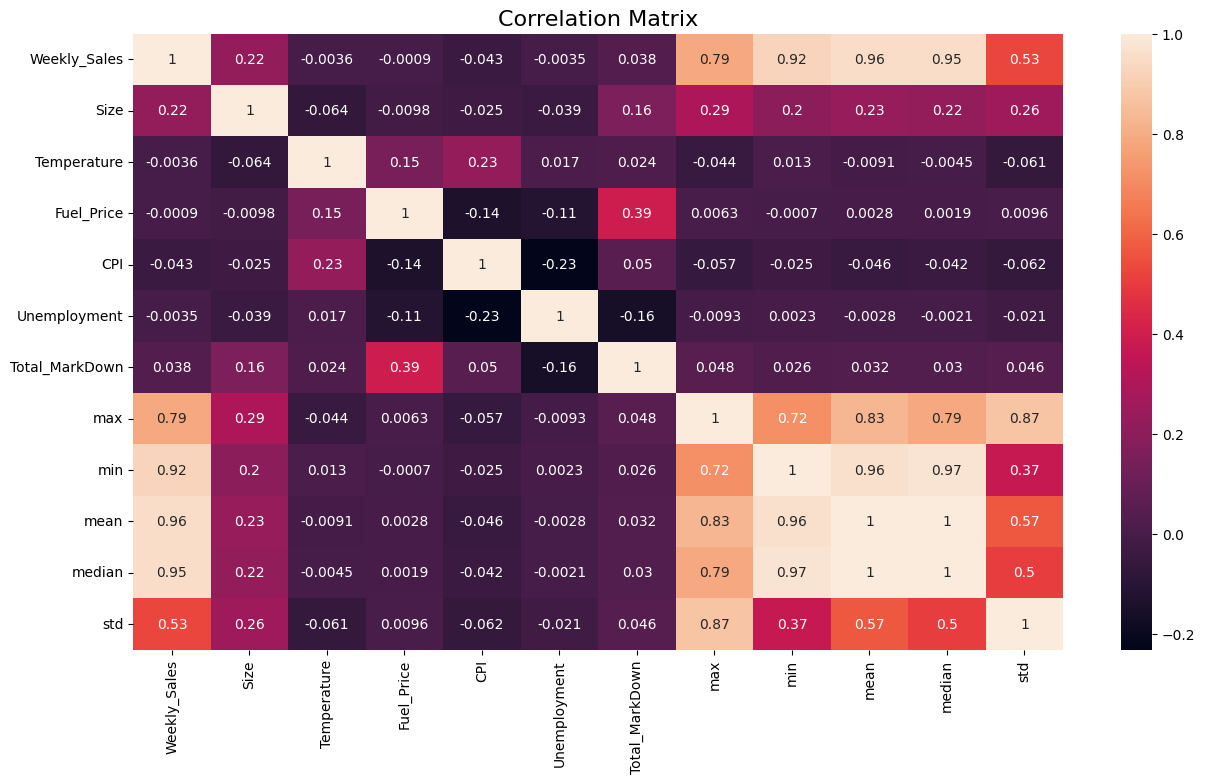

In [ ]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# **Recursive Feature Elimination**

In [ ]:
feature_col = data.columns.difference(['Weekly_Sales', 'Date'])  #removes these 2 columns
feature_col

Index(['CPI', 'Day', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13',
       'Dept_14', 'Dept_16', 'Dept_17',
       ...
       'Type_A', 'Type_B', 'Type_C', 'Unemployment', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [ ]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)    #1/3 rd data of oob samples is used for validation instead of training
radm_clf.fit(data[feature_col], data['Weekly_Sales'])
'''Random Forest provides built-in metrics for assessing feature importance.
This allows for straightforward identification of which features are most influential in predicting sales, facilitating better feature selection.
Calculated to see how much each feature reduces the impurity when making splits in the decision trees.
Features that contribute more to the model's predictive accuracy receive higher importance scores.
'''

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


'Random Forest provides built-in metrics for assessing feature importance.\nThis allows for straightforward identification of which features are most influential in predicting sales, facilitating better feature selection.'

In [ ]:
import os
import pickle
from os import path

In [ ]:
pkl_filename = "./models/feature_elim_regressor.pkl"
os.makedirs(os.path.dirname(pkl_filename), exist_ok=True)

if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


In [ ]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]   #sorts the array
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,8.500643e-01
1,2,median,6.871743e-02
2,3,Month,1.533661e-02
3,4,Temperature,1.126448e-02
4,5,Day,8.817321e-03
...,...,...,...
139,140,Dept_77,3.944057e-10
140,141,Dept_45,3.586291e-10
141,142,Dept_78,7.269054e-12
142,143,Dept_39,2.666805e-13


In [ ]:
x=feature_rank.loc[0:22,['feature']]  #selects top 23 features
x=x['feature'].tolist()
print(x)

['mean', 'median', 'Month', 'Temperature', 'Day', 'CPI', 'Fuel_Price', 'min', 'max', 'std', 'Unemployment', 'Dept_16', 'Total_MarkDown', 'IsHoliday', 'Size', 'Dept_18', 'Dept_3', 'Year', 'Dept_55', 'Dept_9', 'Dept_1', 'Dept_5', 'Dept_11']


In [ ]:
X = data[x]     #input variable
Y = data['Weekly_Sales']  #target variable

In [ ]:
data = pd.concat([X,Y],axis=1)

In [ ]:
data.head()

,mean,median,Month,Temperature,Day,CPI,Fuel_Price,min,max,std,...,Size,Dept_18,Dept_3,Year,Dept_55,Dept_9,Dept_1,Dept_5,Dept_11,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-05,0.334097,0.266472,2,0.320606,5,0.840500,0.0501,0.284535,0.791778,0.469386,...,0.630267,False,False,2019,False,False,True,False,False,0.483042
2019-02-05,0.012990,0.011893,2,0.270089,5,0.875680,0.0501,0.002164,0.034537,0.014447,...,0.492338,False,False,2019,False,False,False,False,False,0.013447
2019-02-05,0.136010,0.131944,2,0.224624,5,0.873861,0.0501,0.145120,0.164845,0.035777,...,0.650636,False,False,2019,False,False,False,False,False,0.167728
2019-02-05,0.125880,0.108111,2,0.270089,5,0.875680,0.0501,0.093787,0.400979,0.172833,...,0.492338,False,False,2019,True,False,False,False,False,0.215577
2019-02-05,0.024608,0.023254,2,0.270089,5,0.875680,0.0501,0.014148,0.047982,0.019416,...,0.492338,False,False,2019,False,False,False,False,False,0.022292




# **Data Splitted into Training, Validation, Test**

In [ ]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

# **Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#training the model and adjusting the parameters of the model based on the data provided.

LinearRegression()

In [ ]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)
#calculating the accuracy of the model , multiplying by 100 so as to convert it into percentage.

Linear Regressor Accuracy -  91.29049317977793


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03673698205962618
MSE 0.0046773602863971146
RMSE 0.0683912296014417
R2 0.912905508242706


In [ ]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.head()
#storing the actual and predicted values in a dataframe.

,Actual,Predicted
Date,,
2019-05-07,0.081570,0.079293
2021-02-17,0.000401,-0.006198
2021-06-01,0.016279,0.032255
2020-05-27,0.572696,0.583047
2019-08-27,0.012229,0.045219


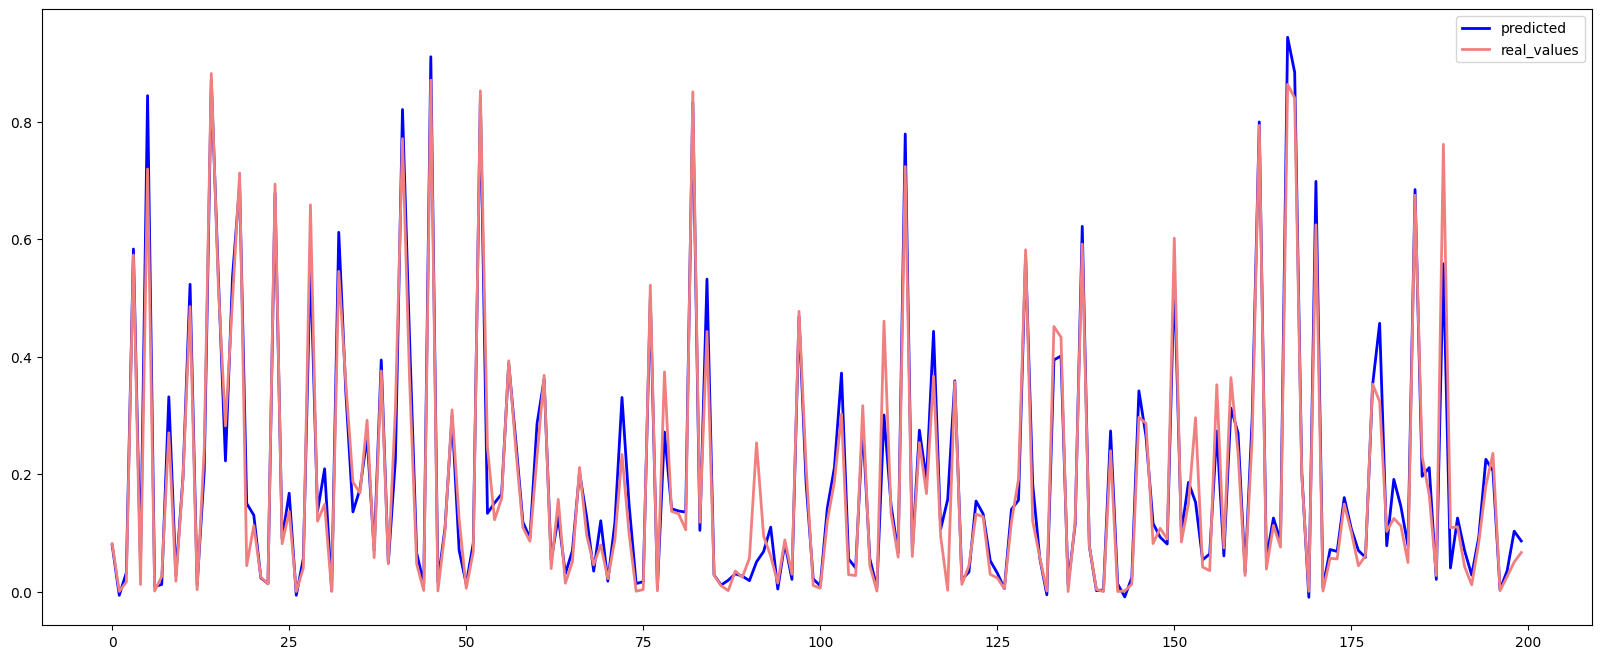

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="predicted", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

#This is basically

Saved model to disk


# **Random Forest Regressor Model**
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions and reduce overfitting.


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_acc = rf.score(X_test,y_test)*100   #computes R^2 score
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.28375069067809


In [ ]:
y_pred = rf.predict(X_test) # Predict the target values for X_test using the trained model

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))  #Mean Absolute Error
print("MSE" , metrics.mean_squared_error(y_test, y_pred))   # Mean Squared Error
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # Root Mean Squared Error
print("R2" , metrics.explained_variance_score(y_test, y_pred))       # R² (Explained Variance Score)

MAE 0.01990185777676365
MSE 0.0014587366322369958
RMSE 0.03819341084843033
R2 0.972844775719085


In [ ]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  #compare actual and predicted
rf_df.head()

,Actual,Predicted
Date,,
2019-05-07,0.081570,0.092568
2021-02-17,0.000401,0.000769
2021-06-01,0.016279,0.027527
2020-05-27,0.572696,0.546262
2019-08-27,0.012229,0.025153


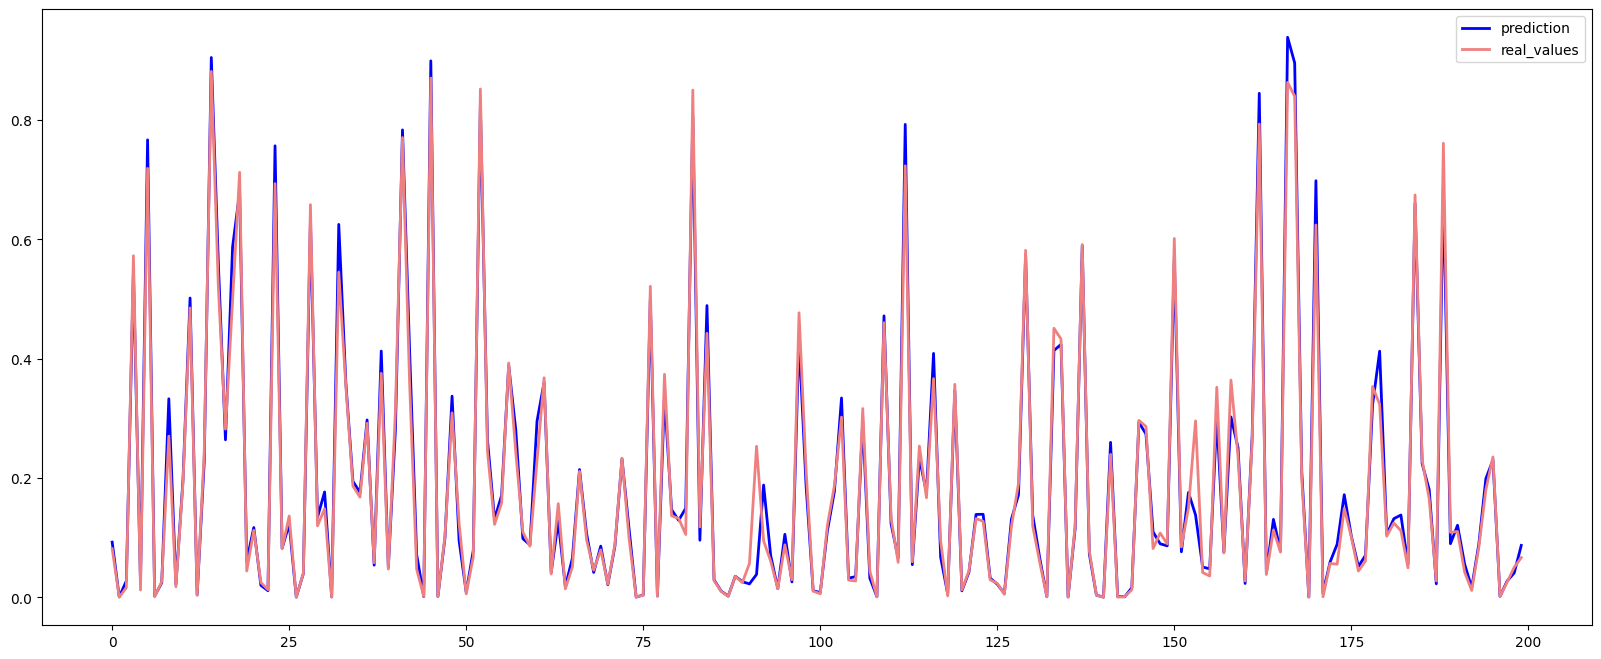

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')   #plot predicted values
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')  #plot actual value
plt.legend(loc="best")
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "./models/randomforest_regressor.pkl"  # Specify the file path for saving the model
if (not path.isfile(pkl_filename)):     # Check if the file does not already exist
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file: # Open the file in write-binary mode
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")   # If the file exists - model is already saved

Saved model to disk


# **K Neighbors Regressor Model**

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
# n_neighbors = 1 --> The prediction is based on the single closest neighbor
# weights = 'uniform' --> All neighbors are equally weighted when making predictions

knn.fit(X_train,y_train)
# X_train --> features; y_train --> target

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  90.14160183082977


In [ ]:
# Predict the target values for test data by using the trained KNN model
y_pred = knn.predict(X_test)

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.0432778314593227
MSE 0.0052943617860088076
RMSE 0.07276236517602219
R2 0.9014580630053091


In [ ]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.head()

,Actual,Predicted
Date,,
2019-05-07,0.081570,0.363189
2021-02-17,0.000401,0.010781
2021-06-01,0.016279,0.024016
2020-05-27,0.572696,0.625308
2019-08-27,0.012229,0.043988


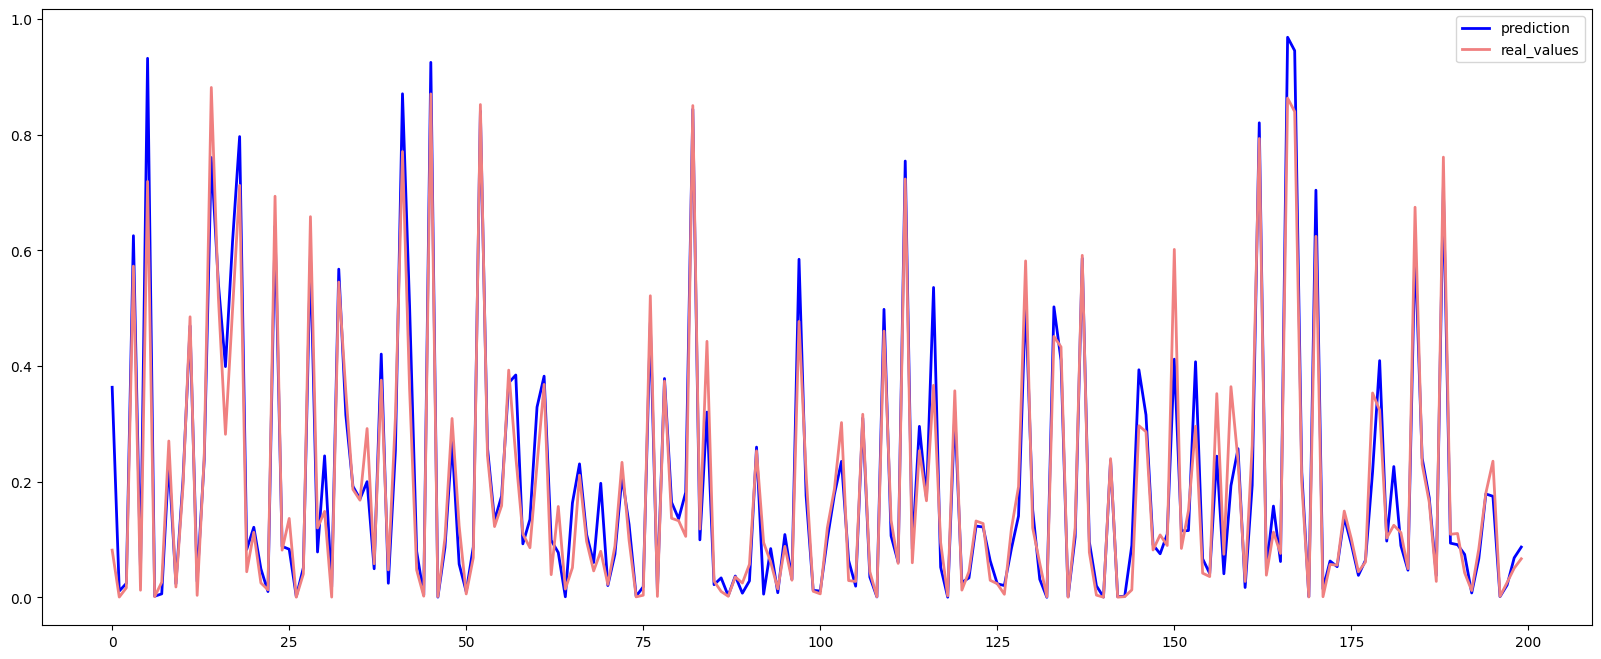

In [ ]:
plt.figure(figsize=(20,8))

# Plot only first 200 samples for both predicted and actual values
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')

plt.legend(loc="best")
plt.show()

**Saving trained model**

In [ ]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **XGboost Model**
XGBoost is a scalable and efficient gradient boosting algorithm designed for speed and performance in machine learning tasks.

XGBoost is effective for sales prediction due to its ability to handle non-linear relationships and large datasets.

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_acc = xgbr.score(X_test,y_test)*100  #computes R^2 score
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  96.45137318437183


In [ ]:
y_pred = xgbr.predict(X_test) # Predict the target values for X_test using the trained model

In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred)) #Mean Absolute Error
print("MSE" , metrics.mean_squared_error(y_test, y_pred)) #Mean Squared Erro
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #Root Mean Squared Error
print("R2" , metrics.explained_variance_score(y_test, y_pred)) #R^2
#MAE measures the average prediction error in absolute terms, making it easy to interpret.
#For instance, if the MAE is 5, it means that, on average, the model’s predictions are off by 5 units.
#MSE emphasizes larger errors by squaring them, highlighting sensitivity to outliers.
#RMSE provides error in the same units as the target variable, making it interpretable.
#R² indicates how well the model explains variance in the target variable, with higher values showing better performance.

MAE 0.025232323656128982
MSE 0.0019057572927234719
RMSE 0.043654980159467165
R2 0.9645140236413139


In [ ]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #reates a DataFrame to compare actual target values with predicted values
xgb_df.head()

,Actual,Predicted
Date,,
2019-05-07,0.081570,0.067820
2021-02-17,0.000401,0.008961
2021-06-01,0.016279,0.027210
2020-05-27,0.572696,0.601158
2019-08-27,0.012229,0.043251


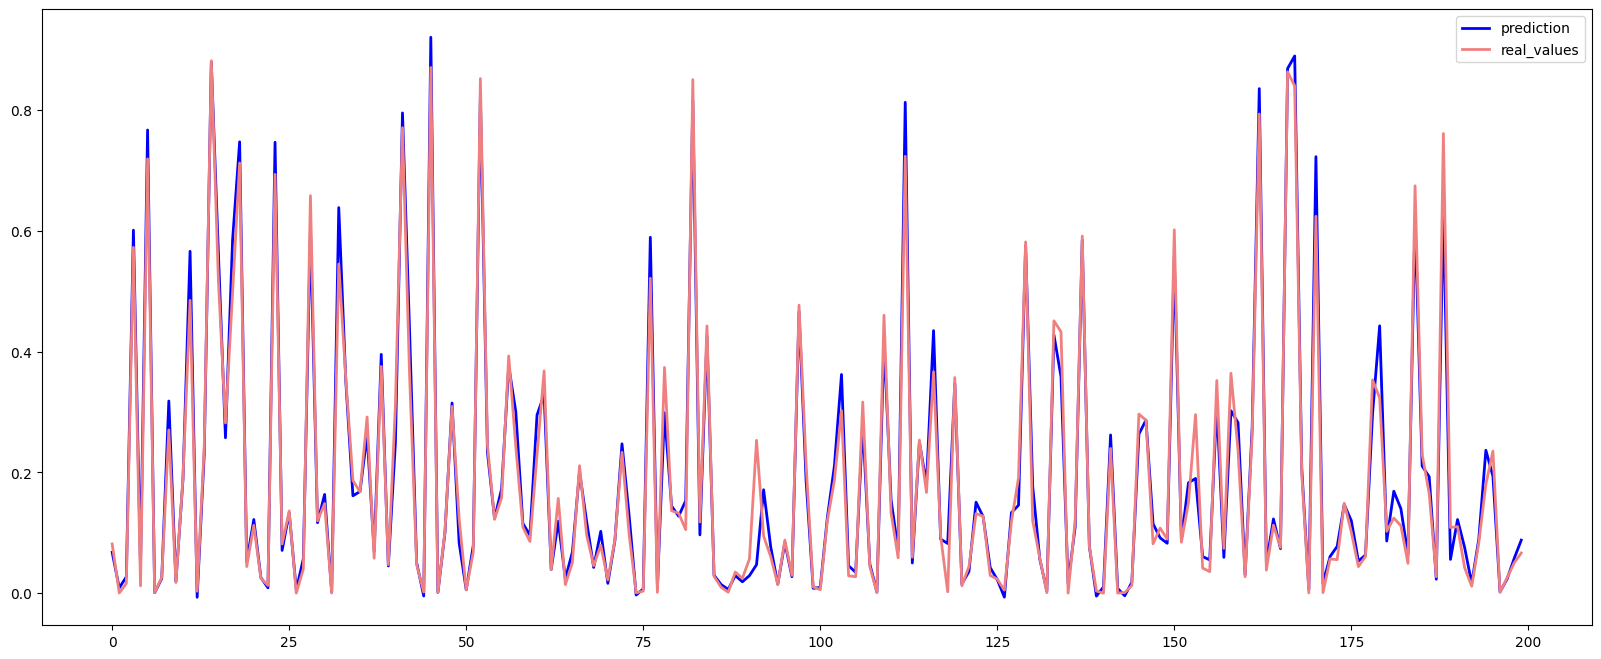

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()
# compare the predicted values from the XGBoost model with the actual values for the first 200 test samples.

**Saving trained model**

In [ ]:
pkl_filename = "./models/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Custom Deep Learning Neural Network**

In [ ]:
def create_model():
  model = Sequential() # layers will be added in sequence
  model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal',activation='relu')) #kernel_initializer - initialses weight of the layers
  # relu introduces non - linearity into the model
  model.add(Dense(32, kernel_initializer='normal')) # has linear activation
  model.add(Dense(1, kernel_initializer='normal')) #has default linear activation
  #the output has only 1 node as it is a regression task and output is one continuous value
  model.compile(loss='mean_absolute_error', optimizer='adam')
  # optimizer -  adjust the weights of a model to minimize the loss function during training.
  # loss - The loss function measures how well the model's predictions match the actual target values.
  # It quantifies the difference between predicted outcomes and actual outcomes.
  return model

In [ ]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1) #verbose - enable us to see progress report while training

In [ ]:
history = estimator_model.fit(X_train, y_train, validation_split=0.3, epochs=200, batch_size=5000)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2666 - val_loss: 0.2426
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2320 - val_loss: 0.1711
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2133 - val_loss: 0.1570
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1559 - val_loss: 0.1463
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3928 - val_loss: 0.3365
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4236 - val_loss: 0.1474
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5223 - val_loss: 0.1383
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1697 - val_loss: 0.1453
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1608 - val_loss: 0.1374
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1302 - val_loss: 0.1219
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3589 - val_loss: 0.1756
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss

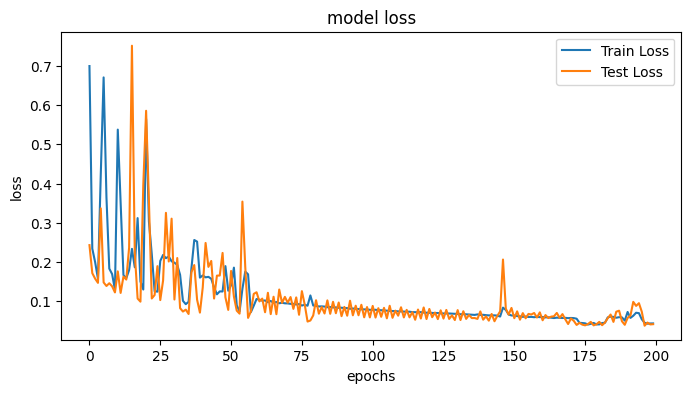

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history_['loss'], label='Train Loss')
plt.plot(history.history_['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  96.29896419583974


In [ ]:
y_pred = estimator_model.predict(X_test)

2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.04121132915578521
MSE 0.005490510953706144
RMSE 0.07409798211629075
R2 0.9077005753386632


In [ ]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.head()

,Actual,Predicted
Date,,
2019-05-07,0.081570,0.078464
2021-02-17,0.000401,-0.012368
2021-06-01,0.016279,0.013051
2020-05-27,0.572696,0.555956
2019-08-27,0.012229,0.026198


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


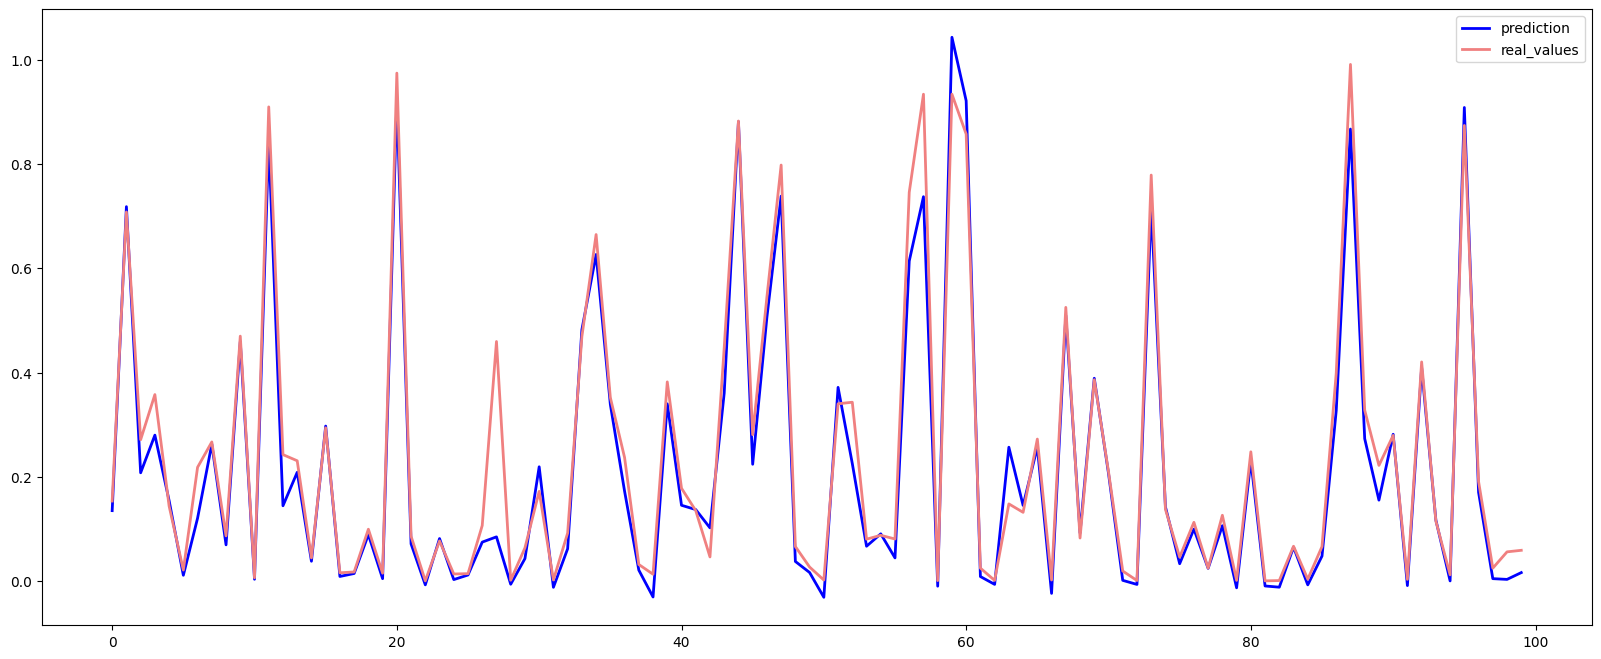

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")

In [ ]:
pkl_filename = "./models/dnn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **Comparing Models**

In [ ]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [ ]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,91.290493
1,rf_acc,97.283751
2,knn_acc,90.141602
3,xgb_acc,96.451373
4,dnn_acc,96.298964


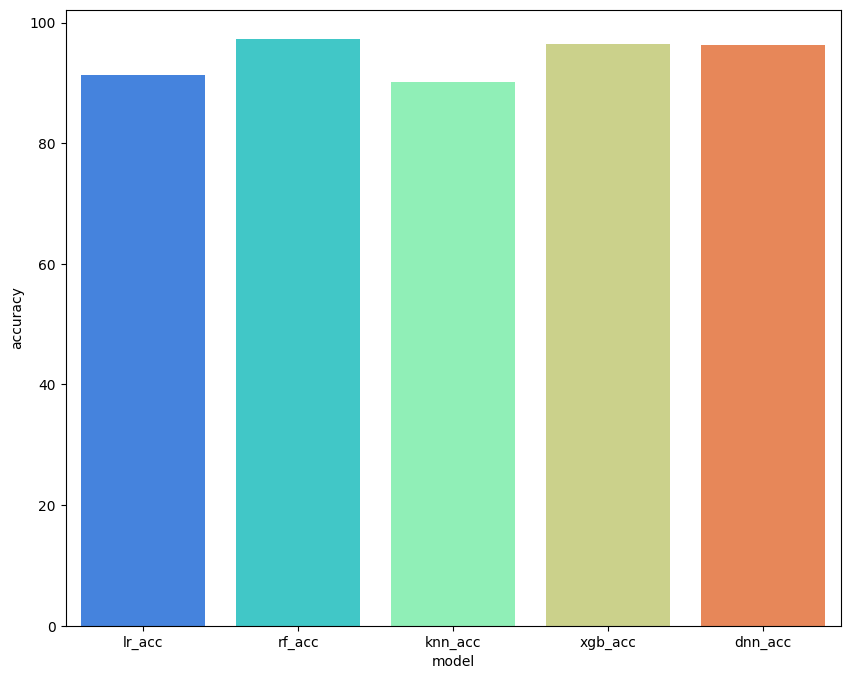

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df,hue='model',palette='rainbow',legend=False)
plt.show()